### Emma Klemets, 260775167   
All my work, code, output and written answers for #2 are in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 2: 
Let’s use conjugate gradient to solve Laplace’s equation with boundary conditions using Green’s functions. With a little cleverness, we can actually do this without needing to set an exterior boundary. For
speed, let’s do this in two dimensions.

#### part a: 
First, we’ll figure out what V (r) (scalar potential) looks like from a point charge. Remember that a 2D point charge looks like a 3D line charge and so will have a log behavior rather than 1/r. We also need to be careful about the singularity at 0. While this can actually be written down properly with some effort, a much easier trick is to note that away from the origin, each point is the average of its neighbors. By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. We’ll ignore eps_0 and set ρ (charge density) to be the potential minus the average of neighbors. 

If you rescale your potential so that ρ[0, 0] = 1 and V [0, 0] = 1
(recall that we can add an arbitrary offset to a potential without affecting the physics of the situation), what is the potential V [1, 0] and V [2, 0]? 

To sanity check your answer, the potential V [5, 0] should be around -1.05.

$\nabla^2 V = -\rho$

$V(r) = -\frac{\lambda}{2\pi\epsilon_0}ln(r)$

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


inf
1.3862943611198908


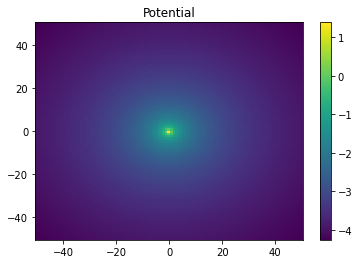

In [180]:
# V (r) looks like from a point charge will have a log behavior rather than 1/r. 

n = 101
# ep_0 = 1 #should I not being using this?

V = np.zeros([n,n])
rad = lambda x, y: np.sqrt(x**2 + y**2)

#our 2D potential from a point charge
twoD_po = lambda r: -np.log(r)#-1/(2*np.pi*ep_0) * np.log(r) #should we have all the constants here?

x=np.linspace(-50,50,n)
xx,yy=np.meshgrid(x,x)

#get indice of [0, 0] since it's in the center of my array
centI = int(n/2)
# print(centI)

#get the potential everywhere
V_r = twoD_po(rad(xx,yy))

# print("r:", r(xx[centI+1, centI],yy[centI+1, centI]))

# print(xx)
#but origin give inf as expected, so deal gotta with that
print(V_r[centI, centI])

# print((V_r[centI+1, centI], V_r[centI, centI+1], V_r[centI-1, centI], V_r[centI, centI-1]))
# for origin
# singularity at 0, trick is to note that away from the origin, each point is the average of its neighbors. 
# By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. 
V_r[centI, centI] = 4*V_r[centI+1, centI] - (V_r[centI+2, centI] + V_r[centI+1, centI+1] + V_r[centI+1, centI-1])

print(V_r[centI, centI])

#it's easy to pass the right x and y indices with this
plt.pcolor(xx, yy, V_r,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

In [181]:
# set ρ to be the potential minus the average of neighbors. 
# rho = V - 0.25*(V_r[centI+1, centI] + V_r[i, i+1] + V_r[i-1, i] + V_r[i, i-1])

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print(rho[centI, centI])

rescale_rho = rho[centI, centI]


1.3862943611198908


In [182]:
#rescale by a multiple so rho[0,0] = 1
V_r = V_r/rescale_rho

# print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
# print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print("Needed offset {} to get density rho[0, 0] = {}".format(rescale_rho, rho[centI, centI]))


Needed offset 1.3862943611198908 to get density rho[0, 0] = 1.0


In [183]:
print(V_r[centI, centI])#, (V_r[centI+5, centI]))#
offset = 1 - V_r[centI, centI] 
V_r = V_r + offset #do I just add it?
#can multiply

print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05 hmm closer but still not quite?

1.0
Needed offset for V: 0.0 to get V[0,0] = 1.0
V[5, 0] = -1.1609640474436809


Density rho[0, 0] = 1.0
potential V[1, 0] = 0.0 and V[2, 0] = -0.49999999999999994


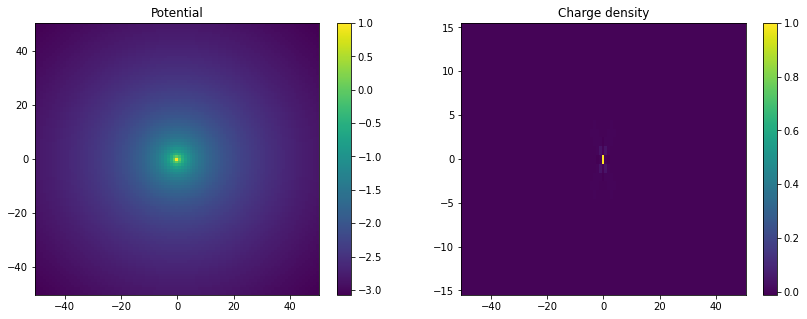

In [184]:
#checking the resulting values

print("Density rho[0, 0] = {}".format(rho[centI, centI]))

print("potential V[1, 0] = {} and V[2, 0] = {}".format(V_r[centI+1, centI], V_r[centI+2, centI]))
# how do I scale rho? won't this change V again?

fig, ax = plt.subplots(1, 2, figsize=(14,5))
im1 = ax[0].pcolor(xx, yy, V_r,  shading='auto')
ax[0].set_title("Potential")
fig.colorbar(im1, ax=ax[0])

b = 35
im2 = ax[1].pcolor(xx[b:-b], yy[b:-b], rho[b:-b],  shading='auto')
ax[1].set_title("Charge density")
fig.colorbar(im2, ax=ax[1])

plt.show()

V[1, 0] = offset, as $V(1 = -\frac{\lambda}{2\pi\epsilon_0}ln(1)) = 0$ and then it's rescaled.

## part b: 
Now that we know what the potential from a point charge is, we can calculate the potential everywhere in space from an arbitrary charge distribution by convolving the charge by our hard-won but eternal Green’s
function. We can write this as V = G x ρ. where G is the Green’s function. Even though we don’t usually think of it that way, this is indeed a matrix equation and so can be solved using conjugate-gradient (or any other tool
you care to use). In this case, though, we start with the potential on some surfaces, and want to find the charge distribution on those same surfaces. Write a conjugate-gradient solver that solves for ρ on a mask given V on
that mask. Use your solver to find the charge on a square box held at a potential of 1. Plot the charge density along one side of the box.

for 2D Laplace: Green's $= \frac{1}{2\pi}ln(r)$

But what happens for r = 0 when this is undefined?


In [185]:
# V = G x ρ (convolution)
# something with 1/2pi * ln(r) for G?
#but all the CG stuff seems to solve for V, not p - and how do 

#  V = 1 along side of box

#convolve two arrays and add a variable amount of padding (p) before doing so
def convFunction(arr1, arr2, p=5):
    
    arrFT1 = np.fft.fft(np.pad(arr1, [0, p]))
    arrFT2 = np.fft.fft(np.pad(arr2, [0, p]))
        
    convolved = np.fft.ifft(arrFT1 * arrFT2)
    
    if p > 0:
        convolved = convolved[:-p,:-p]

    return convolved.real

# convFunction(arr1, arr2)

green = lambda r: 1/(2*np.pi) * np.log(r)

In [190]:
# from laplace_conjgrad.py
def apply_stencil(A,do_A=True):
    tot=np.roll(A,1,axis=0)+np.roll(A,-1,axis=0)+np.roll(A,1,axis=1)+np.roll(A,-1,axis=1)
    if do_A:
        return A-tot/4
    else:
        return -tot/4

def Ax(G, rho, mask): 
    Gp = convFunction(G, rho, p=5)
    
    GpUse=Gp.copy()
    
#     GpUse[mask]=0
#     ans=apply_stencil(Vuse)
#     ans[mask]=0

#     print(GpUse[mask])
    return GpUse

def pad(A):
    AA=np.zeros([A.shape[0]+2,A.shape[1]+2])
    AA[1:-1,1:-1]=A
    return AA

In [187]:
result = np.zeros(V.shape)

result[:V_r.shape[0],:V_r.shape[1]] = V_r

# print(result)

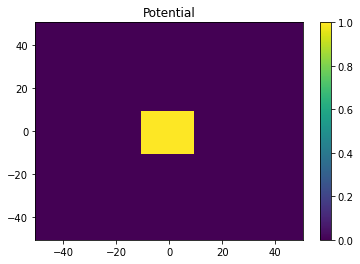

In [208]:
m=101
cM = int(m/2)
s = 10

V=np.zeros([m,m])

#but like all along the box boundary?
# V=V_r
# V[cM-s:cM+s,cM-s] = 1.0

#other sides of box
# V[cM-s:cM+s,cM+s] = 1.0
# V[cM-s, cM-s:cM+s] = 1.0
# V[cM+s, cM-s:cM+s] = 1.0

#solid box?
V=V_r
V[cM-s:cM+s,cM-s:cM+s] = 1.0


# for i in range(-s, s):
#     V += V_r
    
plt.pcolor(xx, yy, V,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


50 50


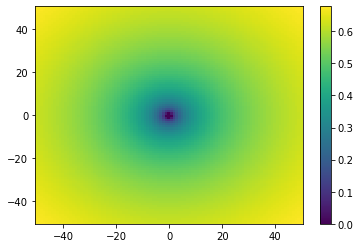

on iteration 0 residual is 400.0


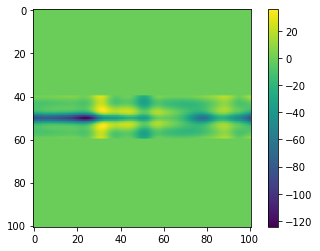

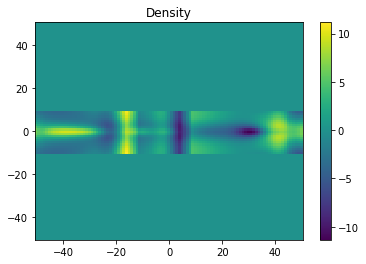

In [213]:
bc=0*V

mask=np.zeros([m,m],dtype='bool')
# mask[:,0]=True
# mask[:,-1]=True
# mask[0,:]=True
# mask[-1,:]=True
#mask[n//2,n//4:(3*n)//4]=True

#mask our line
mask[cM-s:cM+s,cM-s]=True
bc[cM-s:cM+s,cM-s]=1.0

# mask[n//4:n//2,n//2:(3*n)//4]=True
# bc[n//4:n//2,n//2:(3*n)//4]=-1.0

b=V.copy()
# b[mask]=0
#b2=-(bc[1:-1,0:-2]+bc[1:-1,2:]+bc[:-2,1:-1]+bc[2:,1:-1])/4.0

# V=0*bc

#what is b really?
# is it just the 1/2pi * ln(r) function?
x=np.linspace(-50,50,m)
xx,yy=np.meshgrid(x,x)

G = green(rad(xx,yy))
# print(G[50,:])
#I get nans for the center point, cause there r = 0 and log(0) = -inf
#doing this for now but this must be wrong
for i in range(0, m):
    for j in range(0, m):
        if np.isinf(G[i, j]):
            print(i, j)
            G[i, j] = 0.0
# G[cM-s:cM+s,cM-s:cM+s] = 0.0

#also is this not just r, but dep on V at all???
#or should the r go to the nearest point that is rho=0 or smt?
#where does part a come in???
            
#initial guess for rho
rho = np.zeros([m,m])

r=b-Ax(G, rho, mask)

# print(np.nonzero(Ax(G, rho, mask)))

plt.pcolor(xx, yy, G, shading='auto')
plt.colorbar()
plt.show()

p=r.copy()

for k in range(100):
    #Ap=(Ax(pad(p),mask))
    Ap=Ax(G, p, mask)
    #rtr=np.sum(r*r)
    rtr=np.sum(r*r)
    if k%100==0:
        print('on iteration ' + repr(k) + ' residual is ' + repr(rtr))
        #are really not getting smaller
    alpha=rtr/np.sum(Ap*p)

#     V=V+alpha*p #pad(alpha*p)
    rho=rho+alpha*p #pad(alpha*p)

    rnew=r-alpha*Ap
    beta=np.sum(rnew*rnew)/rtr
    p=rnew+beta*p
    r=rnew

plt.imshow(r)
plt.colorbar()
plt.show()

plt.pcolor(xx, yy, rho,  shading='auto')
plt.title("Density")
plt.colorbar()
plt.show()

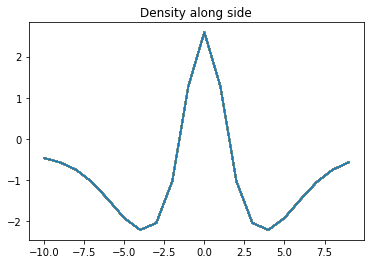

In [214]:
# Plot the charge density along one side of the box.
# cM-s:cM+s,cM-s

# plt.pcolor(xx, yy, rho, shading='auto')
plt.plot(yy[cM-s:cM+s], rho[cM-s:cM+s,cM-s])#, shading='auto')

plt.title("Density along side")
# plt.colorbar()
plt.show()

#### part c: 
Now that you have the charge, show the potential everywhere in space. How close to constant is the potential in the interior of the box? Now plot the x− and y−components of the field just outside the box. Do they agree with what you expect? As a reminder, the boundary conditions are that the field is perpendicular to any equipotential, and that standard lore says that fields are stronger near points.